# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

# File to Load (Remember to change these)
city_data_to_load ="resources/city_data.csv" 
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
#convert the data type of ride_id column from float to int
ride_data_df["ride_id"] = pd.to_numeric(ride_data_df["ride_id"], downcast='integer')

In [3]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
total_rides_by_citytype=pyber_data_df.groupby(['type']).count()['ride_id']
total_rides_by_citytype

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
total_drivers_by_city=city_data_df.groupby(['type']).sum()['driver_count']
total_drivers_by_city

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
total_fare_by_city=pyber_data_df.groupby(['type']).sum()['fare']
total_fare_by_city

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 
avg_ride_fare=pyber_data_df.groupby(['type']).sum()['fare']/pyber_data_df.groupby(["type"]).count()["ride_id"]
avg_ride_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type. 
avg_drivers_fare=pyber_data_df.groupby(['type']).sum()['fare']/city_data_df.groupby(['type']).sum()['driver_count']
avg_drivers_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame({
    "Total Rides":total_rides_by_citytype,
    "Total Drivers":total_drivers_by_city,
    "Total Fares":total_fare_by_city,
    "Average Fare Per Ride":avg_ride_fare,
    "Average Fare Per Driver":avg_drivers_fare})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [12]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:.0f}".format)

pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:.0f}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map('${:,.2f}'.format)

pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map('${:,.2f}'.format)

pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map('${:,.2f}'.format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,1/30/19 0:05,20.76,9018727594352,2,Rural
2372,North Jaime,2/10/19 21:03,11.11,2781339863778,1,Rural
2373,West Heather,5/7/19 19:22,44.94,4256853490277,4,Rural


In [14]:
#convert data column to datetime(which reading as string)
pyber_data_df["date"]=pd.to_datetime(pyber_data_df["date"]) #,format='%m%d%y %H:%M')
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:00,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:00,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:00,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:00,44.94,4256853490277,4,Rural


In [15]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
#df=pyber_data_df.groupby(["type","date"]).sum()['fare']
#df
total_sum_of_fare_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
total_sum_of_fare_df

fare
type  date                      
Rural 2019-01-01 09:45:00  43.69
      2019-01-02 11:18:00  52.12
      2019-01-03 19:51:00  19.90
      2019-01-04 03:31:00  24.88
      2019-01-06 07:38:00  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:00  18.45
      2019-05-08 07:29:00  18.55
      2019-05-08 11:38:00  19.77
      2019-05-08 13:10:00  18.04

[2364 rows x 1 columns]

In [16]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
total_sum_of_fare_df =total_sum_of_fare_df.reset_index()
total_sum_of_fare_df.head(10)

,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33
5,Rural,2019-01-08 06:19:00,19.39
6,Rural,2019-01-09 15:30:00,31.84
7,Rural,2019-01-11 04:39:00,16.42
8,Rural,2019-01-14 07:09:00,18.05
9,Rural,2019-01-14 15:58:00,54.10


In [17]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_table_df=pyber_data_df.pivot_table(index="date",columns="type",values="fare") #, aggfunc='sum')
pivot_table_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
2019-01-01 09:45:00,43.69,NaN,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [18]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_df_frm_pivot = pivot_table_df.loc["01/01/19":"04/29/19"] 
new_df_frm_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
2019-01-01 09:45:00,43.69,NaN,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [19]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_df_frm_pivot.index = pd.to_datetime(new_df_frm_pivot.index)
new_df_frm_pivot.index

DatetimeIndex(['2019-01-01 00:08:00', '2019-01-01 00:46:00',
               '2019-01-01 02:07:00', '2019-01-01 03:46:00',
               '2019-01-01 05:23:00', '2019-01-01 09:45:00',
               '2019-01-01 12:32:00', '2019-01-01 14:40:00',
               '2019-01-01 14:42:00', '2019-01-01 14:52:00',
               ...
               '2019-04-29 11:39:00', '2019-04-29 13:54:00',
               '2019-04-29 16:20:00', '2019-04-29 17:04:00',
               '2019-04-29 19:55:00', '2019-04-29 20:54:00',
               '2019-04-29 21:20:00', '2019-04-29 22:08:00',
               '2019-04-29 23:05:00', '2019-04-29 23:10:00'],
              dtype='datetime64[ns]', name='date', length=2204, freq=None)

In [20]:
# 7. Check that the datatype for the index is datetime using df.info()
new_df_frm_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-29 23:10:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [21]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resample_df=new_df_frm_pivot.resample('W').sum()
resample_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.600,1661.68
2019-01-13,67.65,1070.825,2050.43
2019-01-20,306.00,1218.200,1939.02
2019-01-27,179.69,1203.280,2098.47
2019-02-03,333.08,1042.790,2070.49
2019-02-10,115.80,974.340,2162.64
2019-02-17,95.82,1045.500,2235.07
2019-02-24,419.06,1412.740,2466.29
2019-03-03,175.14,858.460,2218.20


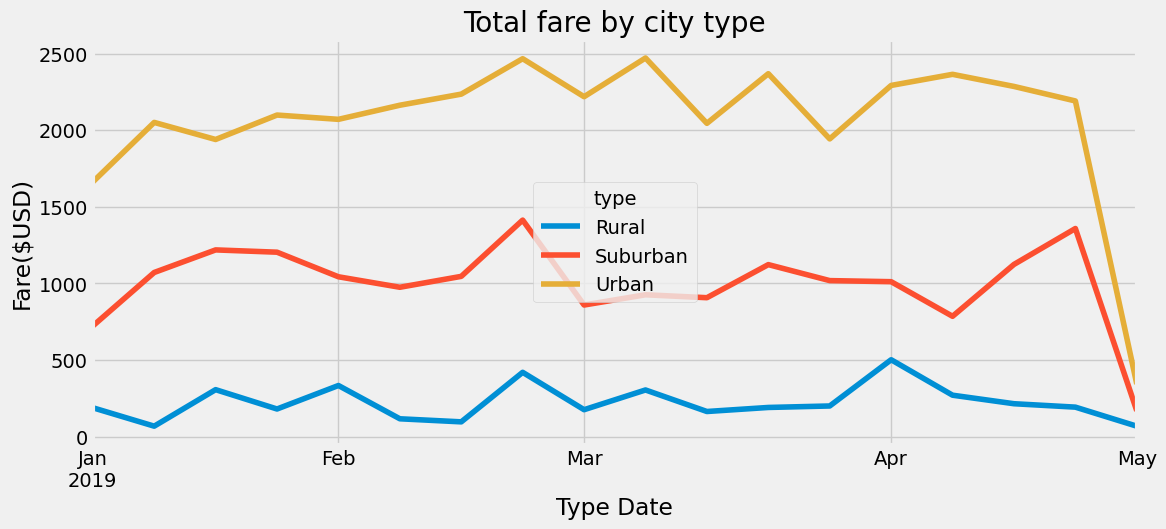

In [23]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
resample_df.plot(figsize=(12,5))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.title('Total fare by city type')
plt.xlabel('Type Date')
plt.ylabel('Fare($USD)')
plt.savefig('analysis/PyBer_fare_Summary.png')


